In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilibs as ul

In [2]:
timepoints = pd.read_csv(r"D:\PPMI_UA_2021\Database\timepoints.csv")
source = r"D:\PPMI_UA_2021\Flight Data"

In [4]:
storage = {}
disp = [i*250 for i in range(15)]
for ifile, file in enumerate(timepoints.fname.tolist()):
    if ifile in disp:
        print(f"{ifile:4.0f}  ... {file} ...")
    idx1 = int(timepoints.tp114.iloc[ifile])
    idx2 = int(timepoints.tp115.iloc[ifile])
    df = pd.read_csv(source + os.path.sep + file +str(".zip"),compression='zip')
    tas_mps =  ul.interpnan(df["tas_mps"][idx1-20:idx2+20])
    tas_mps = tas_mps.loc[idx1:idx2].to_numpy() 
    storage[file] = tas_mps
storage = pd.DataFrame(storage)
storage.to_csv(r"D:\PPMI_UA_2021\Database\tas_mps.csv", index=False)

   0  ... flight_10054 ...
 250  ... flight_13822 ...
 500  ... flight_17667 ...
 750  ... flight_20737 ...
1000  ... flight_24048 ...
1250  ... flight_29115 ...
1500  ... flight_32197 ...
1750  ... flight_35271 ...
2000  ... flight_39205 ...
2250  ... flight_42954 ...
2500  ... flight_46924 ...
2750  ... flight_50266 ...
3000  ... flight_54148 ...
3250  ... flight_57404 ...
3500  ... flight_61816 ...


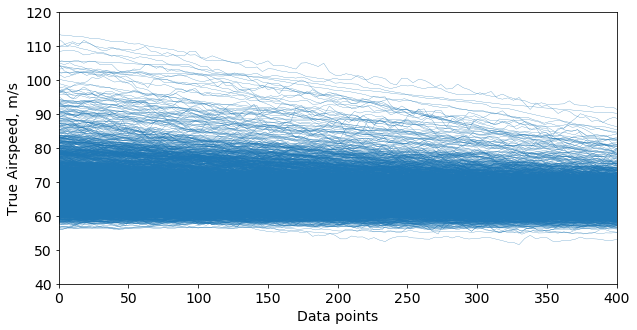

In [3]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\tas_mps.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy(), '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylim([40, 120])
ax.set_ylabel("True Airspeed, m/s", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\tas_mps.png")

In [2]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\tas_mps.csv")
counter, sampling, duration = 0, 16, 5
# Vref =+ 20 knots
max_tas_mps = 75.1
tas_flag = []
for ifile, file in enumerate(df.columns.tolist()):
    tas_mps = df[file].to_numpy()
    for irow, _ in enumerate(tas_mps):
        if irow >= tas_mps.shape[0] - sampling * duration:
            tas_flag.append(0)
            break
        else:
            flag = tas_mps[irow:irow + sampling * duration] >= max_tas_mps
            if sum(flag) >= sampling * duration:
                tas_flag.append(1)
                print(f"{ifile:4.0f} ... {file} ... Unstable")
                counter += 1
                break
sop_criteria = pd.read_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv")
sop_criteria["tas"] = tas_flag
sop_criteria.to_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv", index=False)

   1 ... flight_10060 ... Unstable
  29 ... flight_10407 ... Unstable
  50 ... flight_10774 ... Unstable
  54 ... flight_10808 ... Unstable
  72 ... flight_11042 ... Unstable
  73 ... flight_11044 ... Unstable
 109 ... flight_11495 ... Unstable
 122 ... flight_11659 ... Unstable
 132 ... flight_11713 ... Unstable
 147 ... flight_12025 ... Unstable
 150 ... flight_12053 ... Unstable
 151 ... flight_12057 ... Unstable
 153 ... flight_12061 ... Unstable
 164 ... flight_12272 ... Unstable
 200 ... flight_12995 ... Unstable
 201 ... flight_12999 ... Unstable
 220 ... flight_13341 ... Unstable
 231 ... flight_13552 ... Unstable
 244 ... flight_13796 ... Unstable
 266 ... flight_14093 ... Unstable
 267 ... flight_14095 ... Unstable
 290 ... flight_14521 ... Unstable
 293 ... flight_14527 ... Unstable
 294 ... flight_14529 ... Unstable
 330 ... flight_15126 ... Unstable
 333 ... flight_15158 ... Unstable
 337 ... flight_15201 ... Unstable
 365 ... flight_15522 ... Unstable
 382 ... flight_1569

In [3]:
counter

304